In [1]:
from header import *
from util import *
from projection_plot_nondefault import get_box, annotate_box
#from foggie.utils.get_halo_center import get_halo_center

In [2]:
def get_halo_center(ds, center_guess, radius=50):
    print('Trying to find center within', np.round(radius, decimals=3), 'physical kpc around', center_guess, '...')
    sphere = ds.sphere(center_guess, (radius, 'kpc'))

    x_pos = np.array(sphere['x'].in_units('code_length'))
    y_pos = np.array(sphere['y'].in_units('code_length'))
    z_pos = np.array(sphere['z'].in_units('code_length'))

    dm_density = sphere['Dark_Matter_Density']
    imax1 = (np.where(dm_density > 0.9999 * np.max(dm_density)))[0][0]
    imax2 = (np.where(dm_density == np.max(dm_density)))[0][0]
    print('imax1 =', imax1, 'imax2 =', imax2, 'out of', len(dm_density), 'max density =', np.max(dm_density)) #
    imax = imax1 # imax2
    halo_center = [x_pos[imax], y_pos[imax], z_pos[imax]]
    return halo_center

In [84]:
width = 100 # kpc
proj = 'x'
center_guess = [0.524715, 0.503910, 0.519596]
# [0.0367308, 0.1460984, 0.769466] is center for halo 5205 at z=2 from Anna's catalogue
# [0.5582994, 0.50688271, 0.53809345] is center guess for DD0016 (z=2.0) n7 based on Anna's catalogue and domain shifts from /nobackup/aachary2/bigbox/halo_5205/natural_7n/25Mpc_DM_256-L3-gas.conf_log.txt 
# [0.559647, 0.506729, 0.538345] is center for DD0016 (z=2.0) n7 # [0.560013, 0.505539, 0.538864] with expanded search radius
# [0.559921, 0.505539, 0.538803] is center for RD0111 (z=2.0) n7
# [0.524643, 0.503891, 0.519577] is center for DD0004 (z=6.4) n7 # [0.517624, 0.505844, 0.516647] with expanded search radius
# [0.524715, 0.503910, 0.519596] was center for DD0004 (z=6.4) n9 # [0.521725, 0.50362, 0.517071] with expanded search radius
# [0.521149, 0.504364, 0.517303] is center for DD0003 (z=7.9) n7
# [0.520554, 0.505112, 0.518295] is center for RD0010 (z=8.0) n7
# [0.521057, 0.504456, 0.519348] is center for RD0009 (z=9.0) n7
# [0.511978, 0.507278, 0.514816] was center for RD0010 (z=8.0) n7 PREVIOUSLY

In [85]:
foggie_dir = '/Users/acharyya/models/simulation_output/foggie/'
halo = '5205'
run = 'natural_9n'
output = 'DD0004'
ds = yt.load(foggie_dir + 'halo_' + halo + '/' + run + '/' + output + '/' + output)

yt : [INFO     ] 2022-04-25 23:35:38,378 Parameters: current_time              = 40.816465324838
yt : [INFO     ] 2022-04-25 23:35:38,379 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2022-04-25 23:35:38,380 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-04-25 23:35:38,381 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-04-25 23:35:38,384 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2022-04-25 23:35:38,391 Parameters: current_redshift          = 6.3640378722638
yt : [INFO     ] 2022-04-25 23:35:38,392 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2022-04-25 23:35:38,393 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2022-04-25 23:35:38,395 Parameters: omega_radiation           = 0
yt : [INFO     ] 2022-04-25 23:35:38,397 Parameters: hubble_constant           = 0.695


In [102]:
radius = 20 / (1 + ds.current_redshift) # comoving kpc to physical kpc
center = get_halo_center(ds, center_guess, radius=radius)
print('\nz =', np.round(ds.current_redshift, decimals=3), '\nsearch radius =', np.round(radius, decimals=3), 'kpc physical', '\nguess center at =', center_guess, '\nfound center at =', np.array(center).round(decimals=6).tolist())

Trying to find center within 2.716 physical kpc around [0.524715, 0.50391, 0.519596] ...
imax1 = 18629 imax2 = 18629 out of 22651 max density = 1257431.6389969457 code_mass/code_length**3

z = 6.364 
search radius = 2.716 kpc physical 
guess center at = [0.524715, 0.50391, 0.519596] 
found center at = [0.524715, 0.50391, 0.519596]


In [103]:
box = get_box(ds, proj, center, width)

Extracting box within left and right edges as [0.51447941 0.         0.        ] [0.53495144 1.         1.        ]


yt : [INFO     ] 2022-04-26 16:44:24,702 Projection completed
yt : [INFO     ] 2022-04-26 16:44:24,716 xlim = 0.493674 0.514146
yt : [INFO     ] 2022-04-26 16:44:24,717 ylim = 0.509360 0.529832
yt : [INFO     ] 2022-04-26 16:44:24,718 xlim = 0.493674 0.514146
yt : [INFO     ] 2022-04-26 16:44:24,719 ylim = 0.509360 0.529832
yt : [INFO     ] 2022-04-26 16:44:24,725 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



search radius (red circle) = 2.716 kpc physical 
guess center at (red cross) = [0.524715, 0.50391, 0.519596] 
found center at (white cross) = [0.524715, 0.50391, 0.519596] 
50 physical kpc box (red square) 
250 comoving kpc (48.847 physical kpc) box (white square)



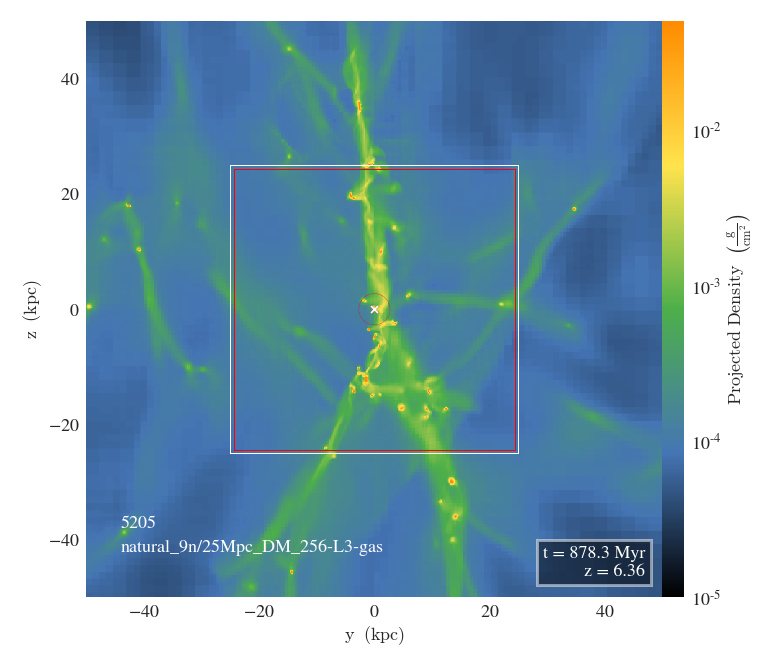

In [104]:
p = yt.ProjectionPlot(ds, proj, 'density', center=center, width=(width, 'kpc'), data_source=box)

p.annotate_text((0.06, 0.12), halo, coord_system='axis')
p.annotate_text((0.06, 0.08), run + '/25Mpc_DM_256-L3-gas', coord_system='axis')
p.annotate_timestamp(corner='lower_right', redshift=True, draw_inset_box=True)

#p.annotate_grids(min_level=6)
p.annotate_marker(center_guess, coord_system='data', plot_args={'color':'r'})
p.annotate_sphere(center_guess, radius=(radius, 'kpc'), circle_args={'color': 'r'})
p.annotate_marker(center, coord_system='data', plot_args={'color':'w'})

p = annotate_box(p, 50, ds, unit='kpc', projection=proj, center=center, linewidth=1, color='white') # 50 physical kpc
p = annotate_box(p, 250 / (1 + ds.current_redshift) / ds.hubble_constant, ds, unit='kpc', projection=proj, center=center, linewidth=1, color='red') # 400 comoving kpc

p.set_cmap('density', density_color_map)
p.set_zlim('density', zmin=1e-5, zmax=5e-2)

print('\nsearch radius (red circle) =', np.round(radius, decimals=3), 'kpc physical', \
      '\nguess center at (red cross) =', center_guess, \
      '\nfound center at (white cross) =', np.array(center).round(decimals=6).tolist(), \
      '\n50 physical kpc box (red square)', \
      '\n250 comoving kpc (' + str(np.round((250 / (1 + ds.current_redshift) / ds.hubble_constant), decimals=3)) + ' physical kpc) box (white square)', \
     )
p.show()